## **1. Packages Installation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.ticker as ticker

## **2. Dataset Preview**

In [2]:
cab_data = pd.read_csv('Datasets/Cab_Data.csv')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
city = pd.read_csv('Datasets/City.csv')
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [4]:
customer_id= pd.read_csv('Datasets/Customer_ID.csv')
customer_id

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [5]:
transaction_id= pd.read_csv('Datasets/Transaction_ID.csv')
transaction_id

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


## **3. Data Preprocessing**

### **3.1. Duplication Validation**

In [6]:
def check_duplicates(df, df_name):
    duplicate_rows = df.duplicated(keep=False)
    res = df[duplicate_rows]
    if res.empty:
        print(f'No duplication identified from dataset {df_name}')
    else:
        print(f'Duplicates found in dataset {df_name}:')
        print(res)

check_duplicates(cab_data, 'cab data')
check_duplicates(city, 'city data')
check_duplicates(customer_id, 'customer_id data')
check_duplicates(transaction_id, 'transaction_id data')

No duplication identified from dataset cab data
No duplication identified from dataset city data
No duplication identified from dataset customer_id data
No duplication identified from dataset transaction_id data


### **3.2. Checking Null Values**

In [7]:
def check_NA(df, df_name):
    res = df.isna().sum()
    if all(i == 0 for i in res):
        print(f'No null values identified from dataset {df_name}')
    else:
        print(f'Null value(s) found in dataset {df_name}:')
        print(res)

check_NA(cab_data, 'cab data')
check_NA(city, 'city data')
check_NA(customer_id, 'customer_id data')
check_NA(transaction_id, 'transaction_id data')

No null values identified from dataset cab data
No null values identified from dataset city data
No null values identified from dataset customer_id data
No null values identified from dataset transaction_id data


### **3.3. Checking Outliers**

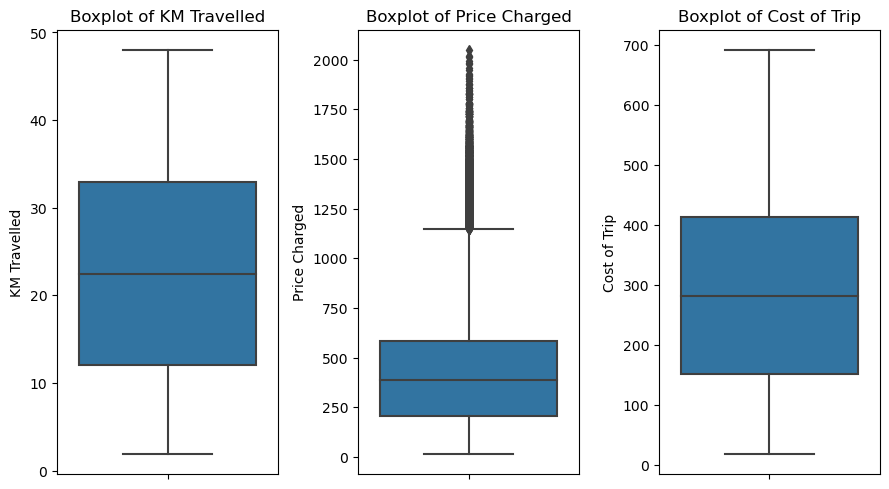

**


In [8]:
# Dataset cab_data
# Creating multiple boxplots
continuous_attributes = ['KM Travelled', 'Price Charged', 'Cost of Trip']  # continuous columns

# Determine the number of subplots needed based on the number of continuous attributes
num_plots = len(continuous_attributes)
plt.figure(figsize=(3 * num_plots,5))

for i, continuous_attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(1, num_plots, i)  # 1 row, num_plots columns, ith plot
    sns.boxplot(y=cab_data[continuous_attribute])
    plt.title(f'Boxplot of {continuous_attribute}')

plt.tight_layout()
plt.show()
print('**')

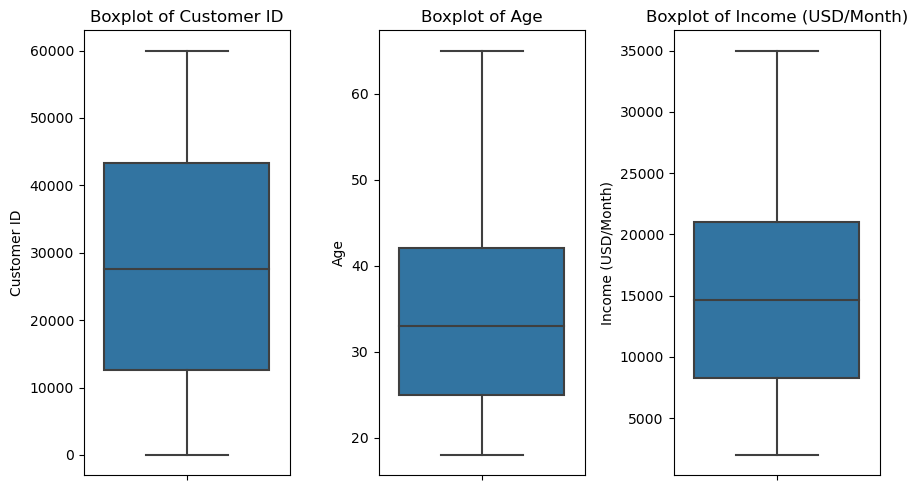

In [9]:
# Dataset customer_id
# Creating multiple boxplots
continuous_attributes = ['Customer ID', 'Age', 'Income (USD/Month)']  # continuous columns

# Determine the number of subplots needed based on the number of continuous attributes
num_plots = len(continuous_attributes)
plt.figure(figsize=(3 * num_plots,5))

for i, continuous_attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(1, num_plots, i)  # 1 row, num_plots columns, ith plot
    sns.boxplot(y=customer_id[continuous_attribute])
    plt.title(f'Boxplot of {continuous_attribute}')

plt.tight_layout()
plt.show()

*It is not necessary to check outliers for the **other two datasets** since the attributes from them are either categorical or discrete variables. 
**"Price Charged" attribute contains outliers, however, it depends on how many km travelled and how long the trip took. It is hard to validate if the outliers are natural or due to human error if the duration of the trip is not available. Hence, outliers are remained.

### **3.4. Dataset Joining And Quick Preprocessing on Merged Dataset**

In [10]:
merged_df1 = pd.merge(cab_data, city, on='City', how='left')
merged_df2 = pd.merge(merged_df1, transaction_id, on = 'Transaction ID', how = 'left')
merged_df3 = pd.merge(merged_df2, customer_id, on = 'Customer ID', how = 'left' )
merged_df3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",52175,Card,Male,32,6423


In [11]:
check_duplicates(merged_df3, 'Final Dataset')
check_NA(merged_df3, 'Final Dataset')

No duplication identified from dataset Final Dataset
No null values identified from dataset Final Dataset


In [12]:
merged_df3['Population'] = merged_df3['Population'].str.replace(',', '').astype(int)

## **4. Feature Engineering: New Feature Creation**

In [13]:
#1 Add a new column showing the profit of each trip for the cab company
merged_df3['Profit'] = merged_df3['Price Charged'] - merged_df3['Cost of Trip']

# Convert 'Date of Travel' to datetime
epoch = datetime(1900, 1, 1)
merged_df3['Date'] = pd.to_datetime(merged_df3['Date of Travel'].apply(lambda x: epoch + timedelta(days=int(x))), errors='coerce')
merged_df3['Date'] = pd.to_datetime(merged_df3['Date'])

In [14]:
# Define your date range
start_date = '2016-01-31'
end_date = '2018-12-31'

# Filter rows where 'Date' is between `start_date` and `end_date`
merged_df3 = merged_df3[(merged_df3['Date'] >= start_date) & (merged_df3['Date'] <= end_date)]

merged_df3.to_csv('/Users/jefferysun/Projects/Week2+3/VC_Week2/Data_Preprocessed/data_preprocessed.csv')

## **5. Exploratory Data Analysis**

### **5.1. Descriptive Statistics for Numerical Variables**

In [15]:
#KM Travelled, Price Charged, Cost of Trip, Income, and Profit
def des_stat(col_name, df_col):
    print(f"The mean value for column {col_name} is {round(np.mean(df_col),2)}.")
    print(f"The median value for column {col_name} is {round(np.median(df_col),2)}.")
    print(f"The variance value for column {col_name} is {round(np.var(df_col),2)}.")
    print(f'The standard deviation value for column {col_name} is {round(np.std(df_col),2)}.')
    print('---------------------')

#Numerical variables filtered
conti_var = ['KM Travelled', 'Price Charged','Cost of Trip', 'Income (USD/Month)','Profit']
for i in conti_var:
    des_stat(i, merged_df3[i])

The mean value for column KM Travelled is 22.57.
The median value for column KM Travelled is 22.44.
The variance value for column KM Travelled is 149.67.
The standard deviation value for column KM Travelled is 12.23.
---------------------
The mean value for column Price Charged is 422.88.
The median value for column Price Charged is 385.97.
The variance value for column Price Charged is 75060.63.
The standard deviation value for column Price Charged is 273.97.
---------------------
The mean value for column Cost of Trip is 286.16.
The median value for column Cost of Trip is 282.46.
The variance value for column Cost of Trip is 24962.7.
The standard deviation value for column Cost of Trip is 158.0.
---------------------
The mean value for column Income (USD/Month) is 15048.02.
The median value for column Income (USD/Month) is 14682.0.
The variance value for column Income (USD/Month) is 63500688.72.
The standard deviation value for column Income (USD/Month) is 7968.73.
------------------

In [16]:
pop_city = merged_df3.groupby('City')['Population'].mean()
des_stat('Population', pop_city)

The mean value for column Population is 1263276.26.
The median value for column Population is 814885.0.
The variance value for column Population is 3007963080666.93.
The standard deviation value for column Population is 1734348.03.
---------------------


### **5.2. Descriptive Statistics for Categorical Variables**

The Frequency count of column City is City
NEW YORK NY       98886
CHICAGO IL        55777
LOS ANGELES CA    47436
WASHINGTON DC     43107
BOSTON MA         29327
SAN DIEGO CA      20237
SILICON VALLEY     8423
SEATTLE WA         7835
ATLANTA GA         7454
DALLAS TX          6904
MIAMI FL           6409
AUSTIN TX          4860
ORANGE COUNTY      3945
DENVER CO          3776
NASHVILLE TN       2987
SACRAMENTO CA      2341
PHOENIX AZ         2039
TUCSON AZ          1911
PITTSBURGH PA      1304
Name: count, dtype: int64
The Proportions of column City is City
NEW YORK NY       0.278585
CHICAGO IL        0.157137
LOS ANGELES CA    0.133638
WASHINGTON DC     0.121443
BOSTON MA         0.082621
SAN DIEGO CA      0.057012
SILICON VALLEY    0.023730
SEATTLE WA        0.022073
ATLANTA GA        0.021000
DALLAS TX         0.019450
MIAMI FL          0.018056
AUSTIN TX         0.013692
ORANGE COUNTY     0.011114
DENVER CO         0.010638
NASHVILLE TN      0.008415
SACRAMENTO CA     0.006595
PHOE

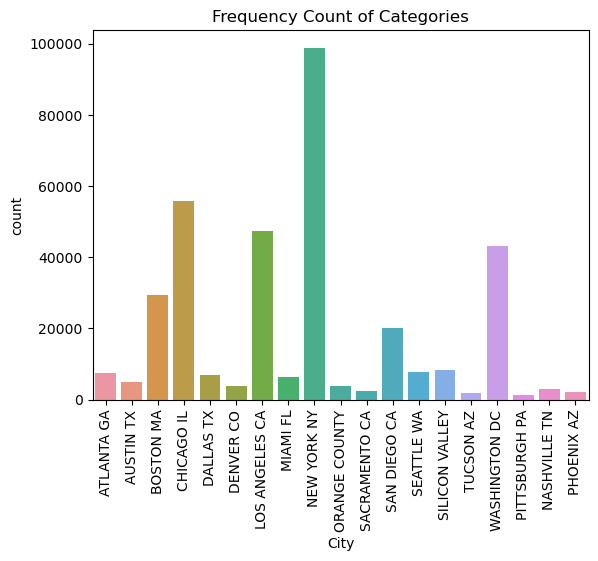

---------------------
The Frequency count of column Payment_Mode is Payment_Mode
Card    212835
Cash    142123
Name: count, dtype: int64
The Proportions of column Payment_Mode is Payment_Mode
Card    0.599606
Cash    0.400394
Name: proportion, dtype: float64


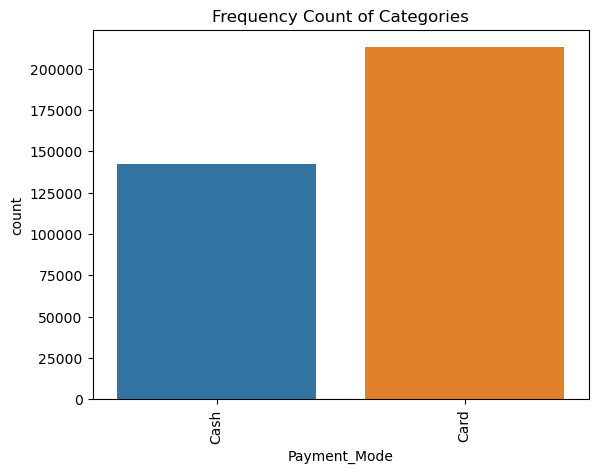

---------------------
The Frequency count of column Gender is Gender
Male      201927
Female    153031
Name: count, dtype: int64
The Proportions of column Gender is Gender
Male      0.568876
Female    0.431124
Name: proportion, dtype: float64


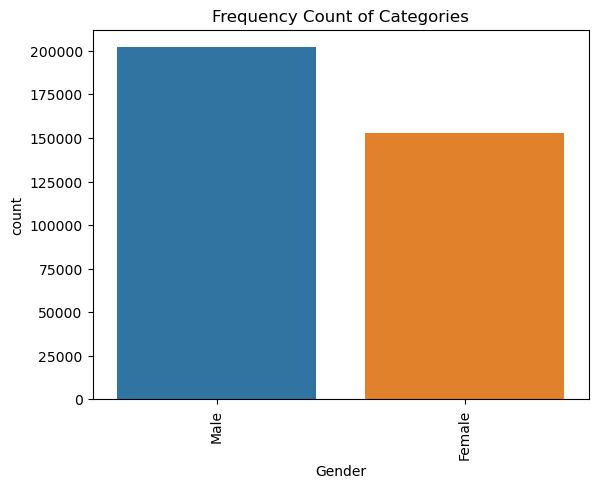

---------------------


In [17]:
cate_var = ['City', 'Payment_Mode', 'Gender']
#1. Frequencies and Proportions
def step_1(col_name, col):
    # Frequency count of categorical variable
    frequency = col.value_counts()
    #  categorical variable
    proportion = col.value_counts(normalize=True)
    print(f'The Frequency count of column {col_name} is {frequency}')
    print(f'The Proportions of column {col_name} is {proportion}')
    # Frequency plot
    sns.countplot(x= col_name, data = merged_df3)
    plt.xticks(rotation='vertical')
    plt.title('Frequency Count of Categories')
    plt.show()
    print('---------------------')
    

for i in cate_var:
    step_1(i, merged_df3[i])

/Users/jefferysun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


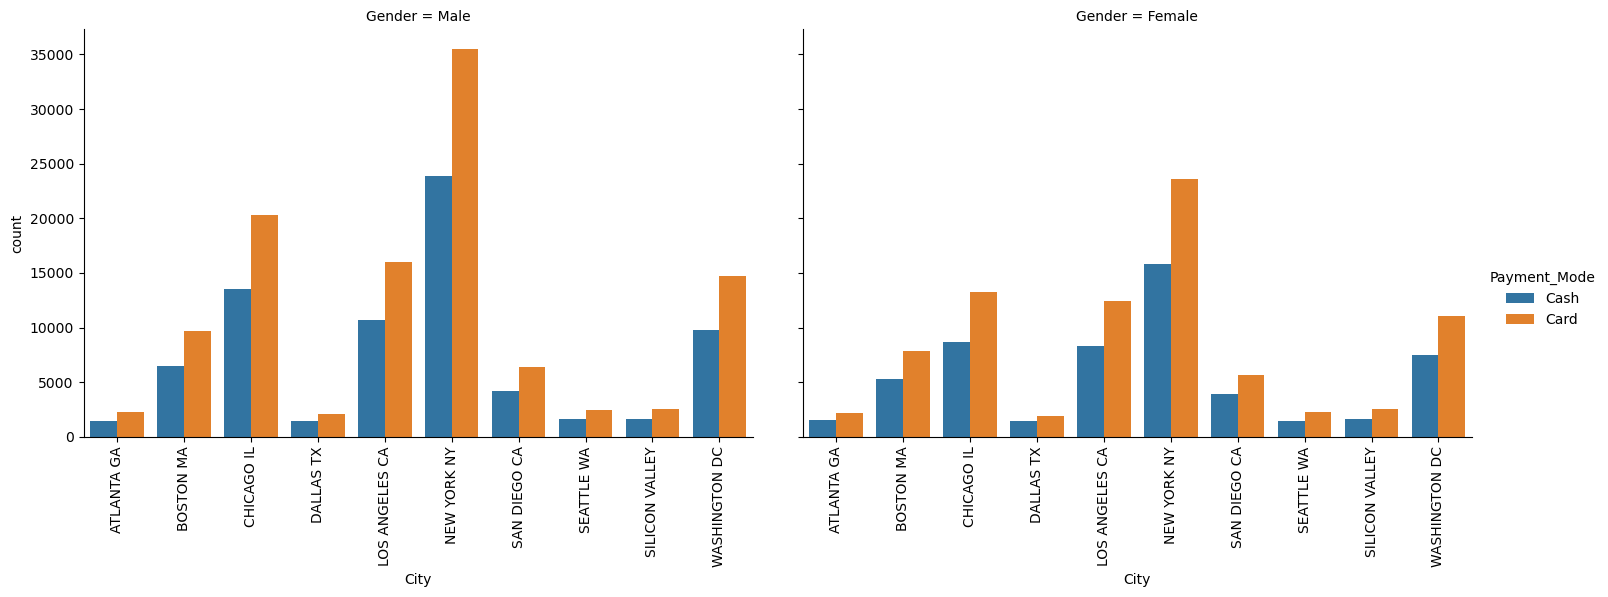

In [18]:
cate_var = ['City', 'Payment_Mode', 'Gender']
# Calculate the top N cities by count
top_cities = merged_df3['City'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top N cities
top_cities_df = merged_df3[merged_df3['City'].isin(top_cities)]

# Now plot with the filtered DataFrame
g = sns.catplot(x="City", hue="Payment_Mode", col="Gender", data=top_cities_df, kind="count", height=5, aspect=1.5)
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


### **5.3. Data Segmentation**

In [19]:
data1 = merged_df3.groupby(['Company','City'])['KM Travelled'].sum()
data2 = merged_df3.groupby(['Company','City'])['Population'].mean()
top_popul_city = merged_df3.groupby('City')['Population'].mean()
mer_data = pd.merge(data1, data2, on = ['Company','City'], how = 'left' )

In [20]:
pink_km = data1['Pink Cab']
yellow_km = data1['Yellow Cab']

In [21]:
top_popul_city = top_popul_city.sort_values(ascending = False)#sorting city by the population
merged_df4 = pd.merge(top_popul_city,pink_km, on = 'City', how = 'left')
merged_df4.rename(columns={'KM Travelled': 'Pink_KM'}, inplace=True)
merged_df4 = pd.merge(merged_df4,yellow_km, on = 'City', how = 'left')
merged_df4.rename(columns={'KM Travelled': 'Yellow_KM'}, inplace=True)

In [22]:
merged_df4['more_scalability'] = merged_df4.apply(lambda row: 'Pink' if row['Pink_KM'] > row['Yellow_KM'] else 'Yellow', axis=1)

In [23]:
#Hypothesis 4: The cab company which operates in cities with larger populations and higher utilization (KM Travelled) has more scalability.
merged_df4

,Population,Pink_KM,Yellow_KM,more_scalability
City,,,,
NEW YORK NY,8405837.0,313614.59,1913023.64,Yellow
CHICAGO IL,1955130.0,207929.23,1054699.92,Yellow
LOS ANGELES CA,1595037.0,444786.35,630329.42,Yellow
MIAMI FL,1339155.0,44444.88,100047.27,Yellow
SILICON VALLEY,1177609.0,85428.43,106045.57,Yellow
ORANGE COUNTY,1030185.0,33322.86,54746.37,Yellow
SAN DIEGO CA,959307.0,237756.36,216975.92,Pink
PHOENIX AZ,943999.0,18571.26,26681.02,Yellow
DALLAS TX,942908.0,29986.93,125179.73,Yellow


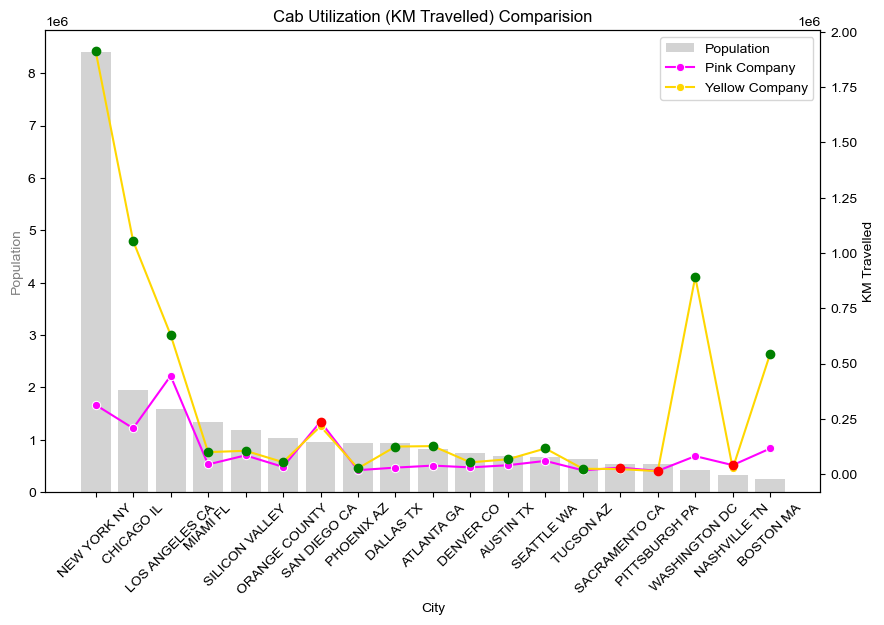

In [24]:
df2 = pd.DataFrame(merged_df4).reset_index()

plt.figure(figsize=(10, 6))

# Create the first axes for the 'Population' bar plot
ax1 = plt.gca()  # Gets the current Axes instance on the current figure
sns.barplot(data=df2, x='City', y='Population', color='lightgrey', label='Population', ax=ax1)

# Create the second axes for the company lines, which shares ax1's x-axis
ax2 = ax1.twinx()

# Create the line plot for 'Pink_Company'
sns.lineplot(data=df2, x='City', y='Pink_KM', marker='o', color='magenta', label='Pink Company', ax=ax2)

# Create the line plot for 'Yellow_Company'
sns.lineplot(data=df2, x='City', y='Yellow_KM', marker='o', color='gold', label='Yellow Company', ax=ax2)

# Because we're using twinx, we need to manually create the legend to combine both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc=0)


# Highlight the data points where one company's data is greater than the other's
for i in range(len(df2)):
    city = df2.iloc[i]
    if city['Pink_KM'] > city['Yellow_KM']:
        plt.plot(city['City'], city['Pink_KM'], 'o', color='red')
    elif city['Pink_KM'] < city['Yellow_KM']:
        plt.plot(city['City'], city['Yellow_KM'], 'o', color='green')

# Setting titles and labels
ax1.set_title('Cab Utilization (KM Travelled) Comparision')
ax1.set_xlabel('City')
ax1.set_ylabel('Population', color='grey')
ax2.set_ylabel('KM Travelled', color='black')

# Ensuring the tick marks match up in the x-axis
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Seaborn styles
sns.set_style("whitegrid")

plt.show()

### **5.4. Trend Analysis**

In [25]:
merged_df3.groupby(['Company','Date'])['Transaction ID'].count()

Company     Date      
Pink Cab    2016-01-31     21
            2016-02-01     57
            2016-02-02     41
            2016-02-03     13
            2016-02-04     15
                         ... 
Yellow Cab  2018-12-27    215
            2018-12-28    201
            2018-12-29    252
            2018-12-30    626
            2018-12-31    630
Name: Transaction ID, Length: 2132, dtype: int64

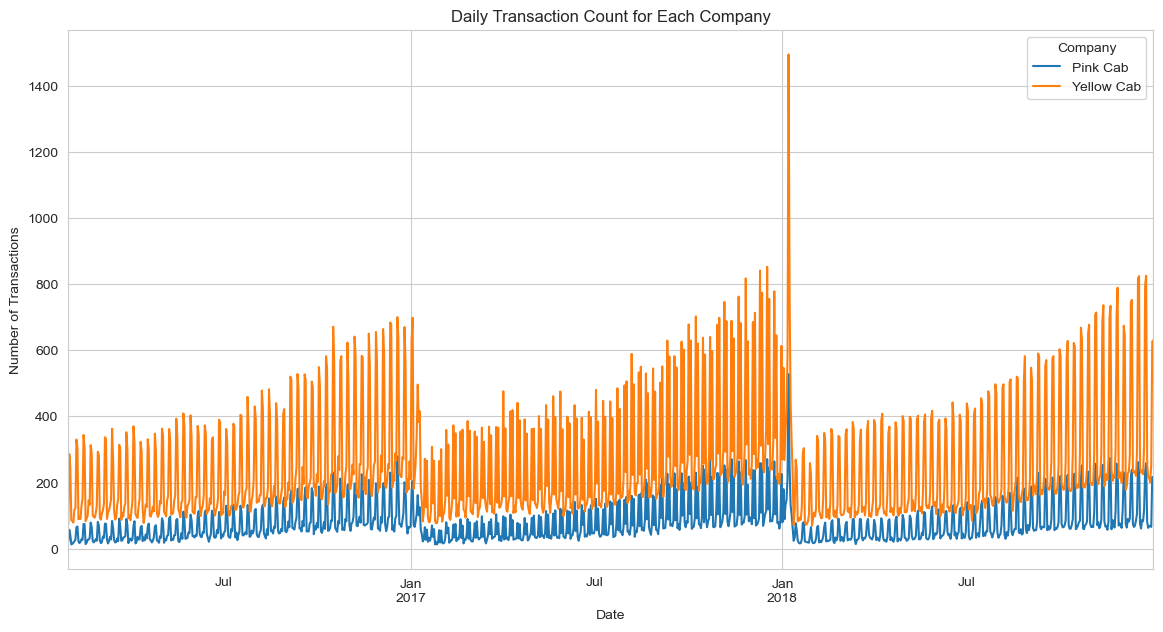

In [26]:
# Group the data by Company and City and calculate the mean Revenue
grouped_df = merged_df3.groupby(['Company','Date'])['Transaction ID'].count().reset_index()

# Pivot the DataFrame to have dates as the index and companies as columns for ease of plotting
pivot_df = grouped_df.pivot(index='Date', columns='Company', values='Transaction ID')

# Now plot the data using pandas built-in plot function which uses matplotlib under the hood
pivot_df.plot(kind='line', figsize=(14, 7), title='Daily Transaction Count for Each Company')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

In [27]:
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'])
grouped_df.set_index('Date', inplace=True)
grouped_df

,Company,Transaction ID
Date,,
2016-01-31,Pink Cab,21
2016-02-01,Pink Cab,57
2016-02-02,Pink Cab,41
2016-02-03,Pink Cab,13
2016-02-04,Pink Cab,15
...,...,...
2018-12-27,Yellow Cab,215
2018-12-28,Yellow Cab,201
2018-12-29,Yellow Cab,252


In [28]:
quarterly_resampled_df = grouped_df.groupby('Company').resample('Q')['Transaction ID'].sum().reset_index()
quarterly_resampled_df.head()

,Company,Date,Transaction ID
0,Pink Cab,2016-03-31,2346
1,Pink Cab,2016-06-30,4504
2,Pink Cab,2016-09-30,7196
3,Pink Cab,2016-12-31,9986
4,Pink Cab,2017-03-31,4533


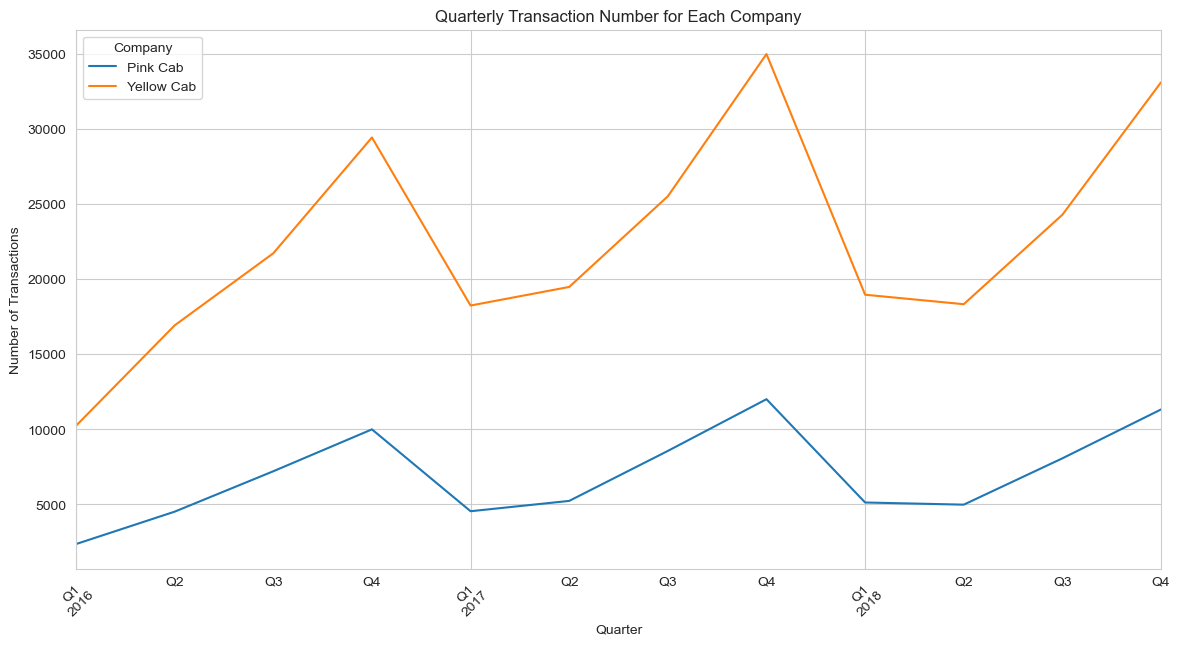

In [29]:
# Pivot the DataFrame for ease of plotting
pivot_df_corrected = quarterly_resampled_df.pivot(index='Date', columns='Company', values='Transaction ID')
pivot_quarterly_resampled_df = pivot_df_corrected[pivot_df_corrected.index < '2019-01-01']

# Plot the quarterly data
pivot_quarterly_resampled_df.plot(kind='line', figsize=(14, 7), title='Quarterly Transaction Number for Each Company')
plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45) 
plt.show()

### **5.4. Correlation Analysis**

In [30]:
#Data Preprocessing
merged_df3['Users']= merged_df3['Users'].str.replace(',', '').str.strip()
merged_df3['Users']  = pd.to_numeric(merged_df3['Users'])
merged_df3['Payment_Mode'] = merged_df3['Payment_Mode'].replace({'Card': 1, 'Cash': 2})
merged_df3['Gender'] = merged_df3['Gender'].replace({'Male': 1, 'Female': 2})


/var/folders/pk/whtjmk891715kqytt1xw7pfw0000gn/T/ipykernel_80678/787197345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df3['Users']= merged_df3['Users'].str.replace(',', '').str.strip()
/var/folders/pk/whtjmk891715kqytt1xw7pfw0000gn/T/ipykernel_80678/787197345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df3['Users']  = pd.to_numeric(merged_df3['Users'])
/var/folders/pk/whtjmk891715kqytt1xw7pfw0000gn/T/ipykernel_80678/787197345.py:4: SettingWithCopyWarning: 
A value is trying to

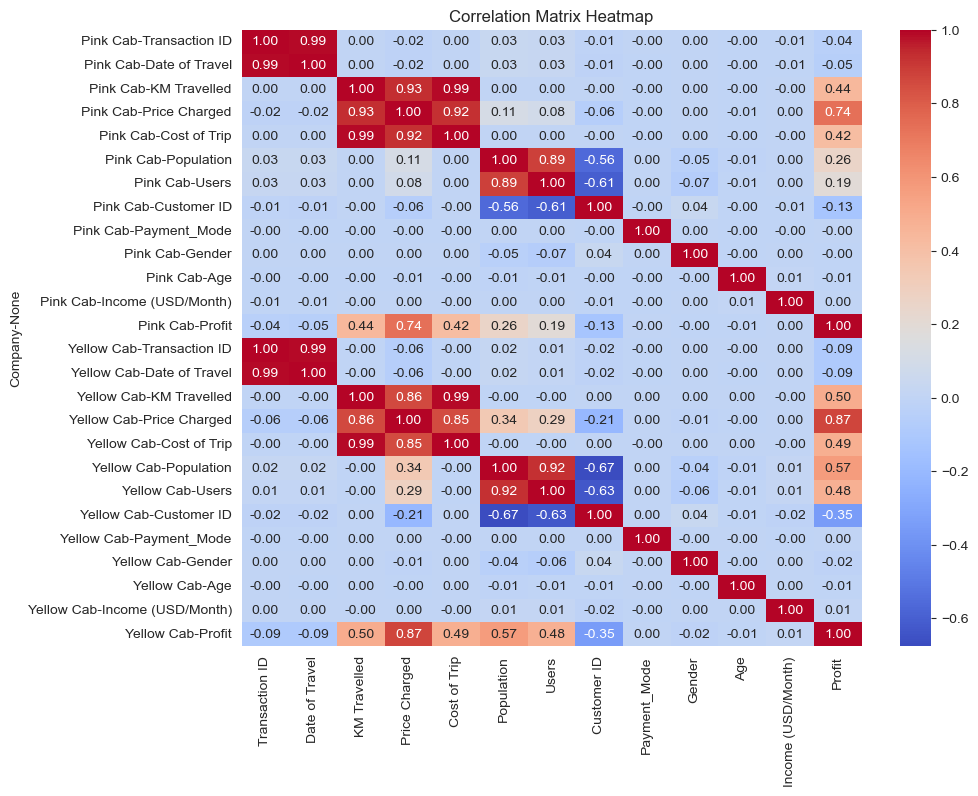

In [31]:
merged_df4 = merged_df3.drop(columns=['Date','City'])
corr_matrix = merged_df4.groupby('Company').corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### **5.5. Profit Analysis**

In [32]:
merged_df3['Date']

3303     2016-02-04
3304     2016-01-31
3309     2016-02-01
3310     2016-01-31
3311     2016-02-03
            ...    
359387   2018-01-10
359388   2018-01-06
359389   2018-01-07
359390   2018-01-07
359391   2018-01-04
Name: Date, Length: 354958, dtype: datetime64[ns]

In [33]:
year = merged_df3['Date'].dt.year
profit_a = merged_df3.groupby(['Company',year])['Profit'].mean().round(2)
df = pd.DataFrame(profit_a).reset_index()
df

,Company,Date,Profit
0,Pink Cab,2016,67.54
1,Pink Cab,2017,67.11
2,Pink Cab,2018,53.60
3,Yellow Cab,2016,167.32
4,Yellow Cab,2017,168.89
5,Yellow Cab,2018,143.76


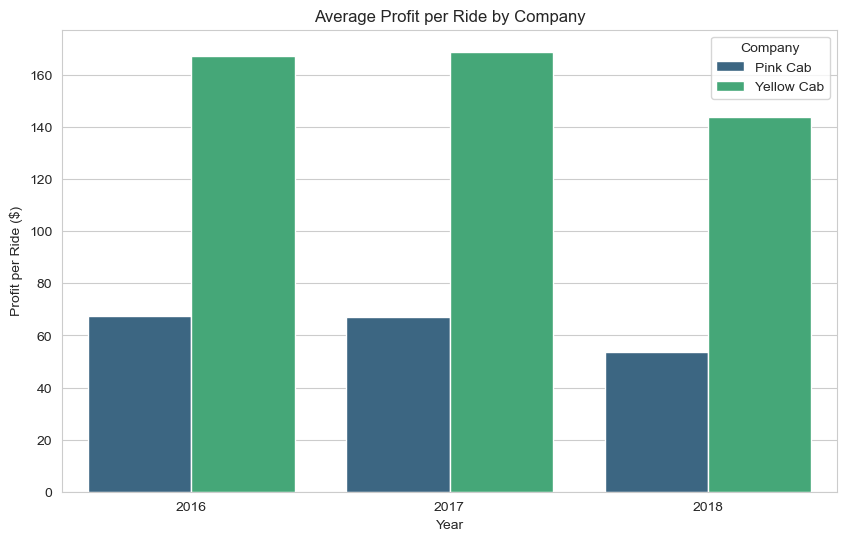

In [34]:
# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Date', y='Profit', hue='Company', palette='viridis')

plt.title('Average Profit per Ride by Company')
plt.xlabel('Year')
plt.ylabel('Profit per Ride ($)')
plt.xticks(rotation=0)  # Keep the years displayed vertically
plt.legend(title='Company')

# Seaborn styles
sns.set_style("whitegrid")

plt.show()

In [35]:
a = merged_df3.groupby('Company')['Profit'].sum().round()

In [36]:
b = merged_df3.groupby('Company')['Profit'].count()

In [37]:
res = a/b
round(res,2)

Company
Pink Cab       62.49
Yellow Cab    159.66
Name: Profit, dtype: float64

In [38]:
data = merged_df3.groupby('Company')['Transaction ID'].nunique()
df = pd.DataFrame(data).reset_index()
df

,Company,Transaction ID
0,Pink Cab,83789
1,Yellow Cab,271169


In [39]:
data = merged_df3.groupby(['Company','City'])['Transaction ID'].nunique()
df2 = pd.DataFrame(data).reset_index()
df2.head()

,Company,City,Transaction ID
0,Pink Cab,ATLANTA GA,1738
1,Pink Cab,AUSTIN TX,1858
2,Pink Cab,BOSTON MA,5120
3,Pink Cab,CHICAGO IL,9248
4,Pink Cab,DALLAS TX,1358


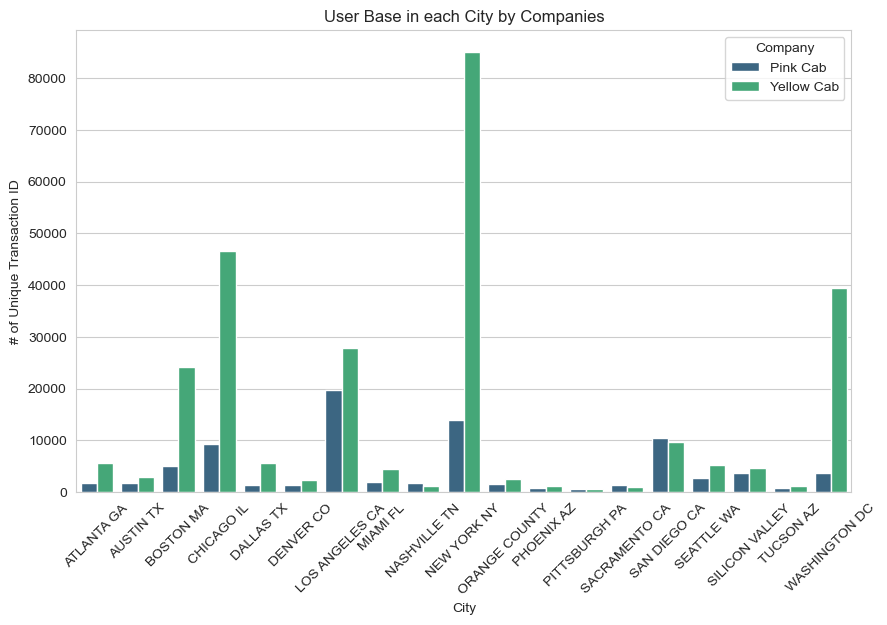

In [40]:
# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df2, x='City', y='Transaction ID', hue='Company', palette='viridis')

plt.title('User Base in each City by Companies')
plt.xlabel('City')
plt.ylabel('# of Unique Transaction ID')
plt.xticks(rotation=45) 
plt.legend(title='Company')

# Seaborn styles
sns.set_style("whitegrid")

plt.show()

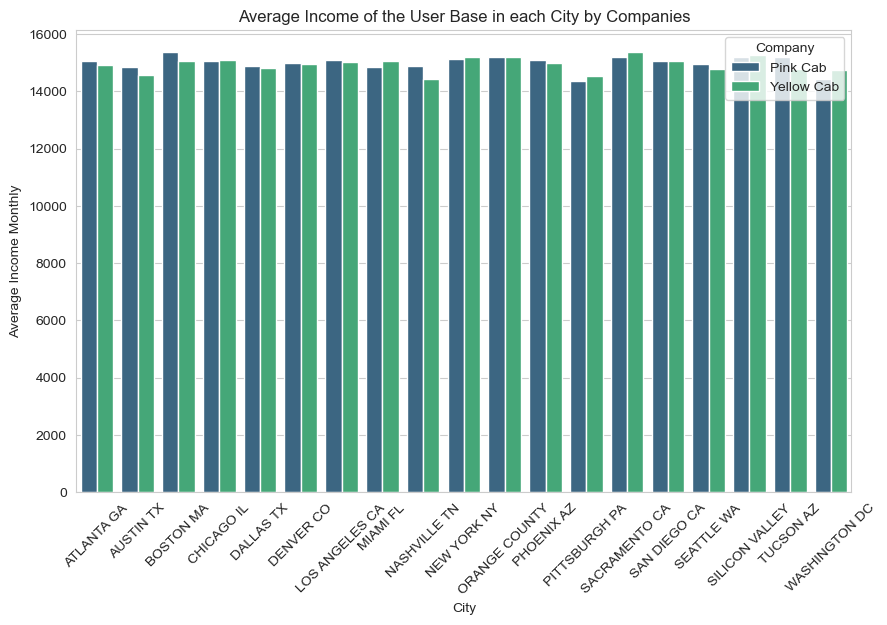

In [41]:
data = merged_df3.groupby(['Company','City'])['Income (USD/Month)'].mean()
df2 = pd.DataFrame(data).reset_index()
df2.head()

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df2, x='City', y='Income (USD/Month)', hue='Company', palette='viridis')

plt.title('Average Income of the User Base in each City by Companies')
plt.xlabel('City')
plt.ylabel('Average Income Monthly')
plt.xticks(rotation=45) 
plt.legend(title='Company')

# Seaborn styles
sns.set_style("whitegrid")

plt.show()

In [42]:
data = merged_df3.groupby(['Company'])['Income (USD/Month)'].mean().round(2)
data

Company
Pink Cab      15058.89
Yellow Cab    15044.66
Name: Income (USD/Month), dtype: float64

In [43]:
grouped_df = merged_df3.groupby(['Company','Date'])['Profit'].sum().reset_index()
grouped_df.set_index('Date', inplace=True)
quarterly_data = grouped_df.groupby('Company').resample('Q')['Profit'].sum().round(2).reset_index()
quarterly_data.head()

,Company,Date,Profit
0,Pink Cab,2016-03-31,183169.49
1,Pink Cab,2016-06-30,214305.86
2,Pink Cab,2016-09-30,380463.40
3,Pink Cab,2016-12-31,845269.14
4,Pink Cab,2017-03-31,372938.89


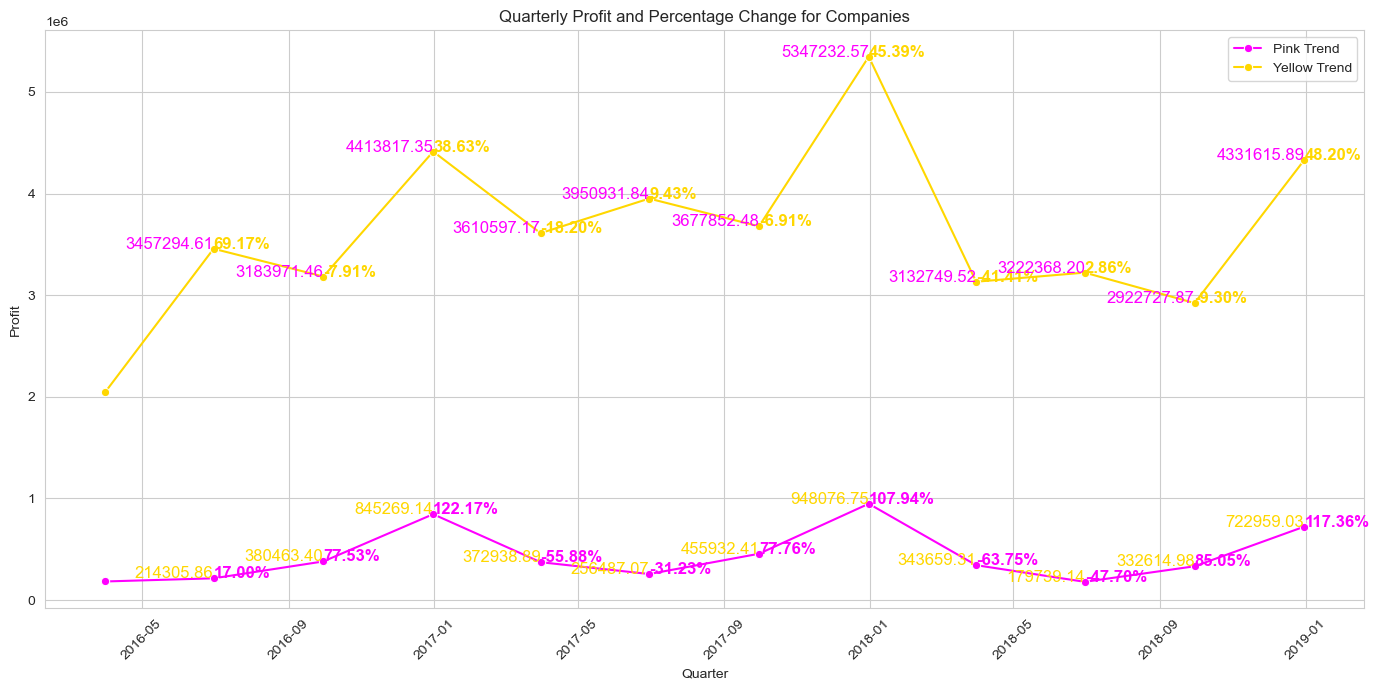

In [44]:
# Convert 'Date' to datetime to ensure proper ordering in plot
quarterly_data['Date'] = pd.to_datetime(quarterly_data['Date'])

# Sort the DataFrame based on Date to ensure correct plotting order
quarterly_data.sort_values('Date', inplace=True)

# Calculate percentage change for each company
quarterly_data['Percent_Change'] = quarterly_data.groupby('Company')['Profit'].pct_change() * 100

# Start plotting
plt.figure(figsize=(14, 7))

# Use seaborn to plot line for Pink Cab trend
sns.lineplot(data=quarterly_data[quarterly_data['Company'] == 'Pink Cab'], x='Date', y='Profit', color='magenta', marker='o', label='Pink Trend')

# Use seaborn to plot line for Yellow Cab trend
sns.lineplot(data=quarterly_data[quarterly_data['Company'] == 'Yellow Cab'], x='Date', y='Profit', color='gold', marker='o', label='Yellow Trend')

# Annotate percentage change for each company on each bar
for index, row in quarterly_data.iterrows():
    if not pd.isna(row['Percent_Change']):
        if row['Company'] == 'Pink Cab':
            plt.text(row['Date'], row['Profit'], f"{row['Percent_Change']:.2f}%", color='magenta', ha='left', size = 'large',fontweight = 'bold')
            plt.text(row['Date'], row['Profit'], f"{row['Profit']:.2f}", color='gold', ha='right', size = 'large')
        else:
            plt.text(row['Date'], row['Profit'], f"{row['Percent_Change']:.2f}%", color='gold', ha='left', size = 'large',fontweight = 'bold')
            plt.text(row['Date'], row['Profit'], f"{row['Profit']:.2f}", color='magenta', ha='right', size = 'large')

# Labels and titles
plt.title('Quarterly Profit and Percentage Change for Companies')
plt.xlabel('Quarter')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [45]:
quarterly_data.groupby('Company')['Percent_Change'].mean()

Company
Pink Cab      36.932541
Yellow Cab    11.813227
Name: Percent_Change, dtype: float64

In [46]:
grouped_df = merged_df3.groupby(['Company','Date'])[['Price Charged','KM Travelled']].mean().reset_index()
grouped_df.set_index('Date', inplace=True)
quarterly_data = grouped_df.groupby('Company').resample('Y')[['Price Charged','KM Travelled']].mean().round(2).reset_index()
quarterly_data['Price Competitiveness Index'] = round(quarterly_data['KM Travelled']/quarterly_data['Price Charged'],4)
quarterly_data

,Company,Date,Price Charged,KM Travelled,Price Competitiveness Index
0,Pink Cab,2016-12-31,304.75,22.44,0.0736
1,Pink Cab,2017-12-31,306.42,22.61,0.0738
2,Pink Cab,2018-12-31,292.80,22.62,0.0773
3,Yellow Cab,2016-12-31,460.58,22.63,0.0491
4,Yellow Cab,2017-12-31,461.52,22.54,0.0488
5,Yellow Cab,2018-12-31,435.86,22.53,0.0517


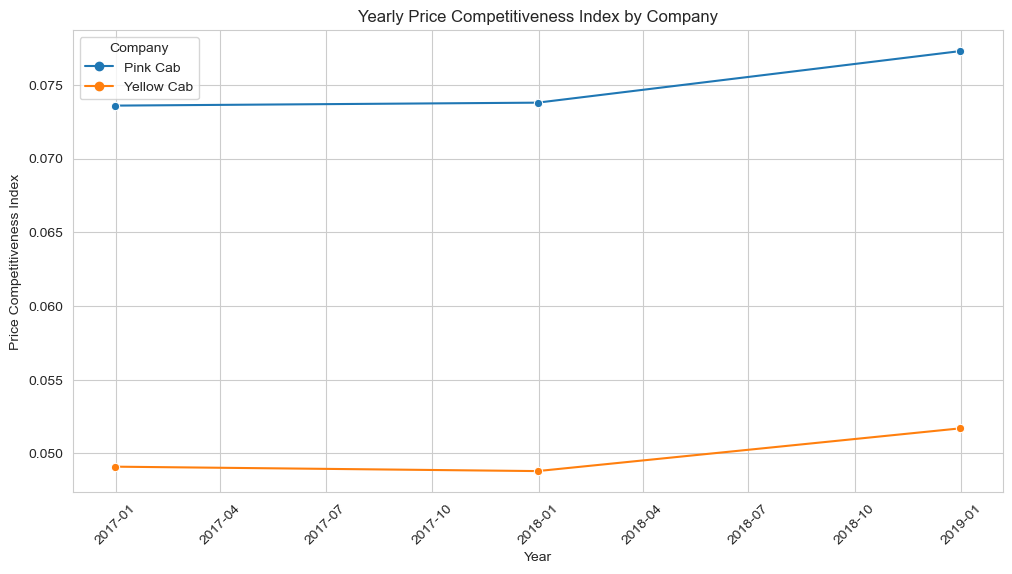

In [47]:
# Pivot the DataFrame to have one line per company and dates on the x-axis
pivot_df = quarterly_data.pivot(index='Company', columns='Date', values='Price Competitiveness Index')

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for each company
sns.lineplot(data=pivot_df.T, dashes=False, markers=['o']*pivot_df.shape[0])

# Customize the plot
plt.title('Yearly Price Competitiveness Index by Company')
plt.xlabel('Year')
plt.ylabel('Price Competitiveness Index')
plt.xticks(rotation=45)
plt.legend(title='Company')

# Show the plot
plt.show()


## **6. EDA recommendation and hypothesis results**

- **EDA Recommendation** should be referred back to the code blocks above.
- **The Yellow Cab** earned a higher average **Profit per ride**.
- **The Yellow Cab** has a more extensive user base, indicating better market penetration and growth potential.
- Both companies own a modern and affluent customer base.
- **The Yellow Cab** operates in cities with larger populations and higher utilization (KM Travelled).
- Consistency in performance (less variability in Profit and Income) over time might indicate a more reliable investment: **Pink Cab**.
- **The Pink Cab** maintains competitive pricing (Price Charged vs. KM Travelled). However, **the Yellow Cab** operates at a much higher profitability (Approx. 2.6x).

